# Exercise 3

In this exercise we will prepare some of the basic operations for finite elements methods. One crucial part for this is to compute integrals. Since the analytic solution may not always be known, we will introduce quadrature rules, that will allow us to approximate the integral of generic functions $f:\Omega\to\mathbb{R}$ numerically:
$$
\int_\Omega f(x)\text{d}x \approx \sum_{i=1}^p f(x_i) w_i, 
$$
for some ```quadrature nodes``` $x_i\in\Omega$ and ```quadrature weights``` $w_i\in\mathbb{R}$, for $i=1,\ldots,p$.
For now we will limit ourselves to $\Omega = [-1,1]$. For this simple domain there exist the Gauss-Legendre quadrature rules, which are optimal in some sense. 


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la


gauss_nodes = {
    1 : np.array( [[0.], [2.]] ),
    2 : np.array( [[-np.sqrt(1/3), np.sqrt(1/3)],[ 1.,1.]]),
    3 : np.array( [[-np.sqrt(3/5),0, np.sqrt(3/5)],[ 5/9.,8/9, 5/9 ]]),
    4 : np.array( 
        [
           [ 
                 -np.sqrt(3/7+ 2/7 * np.sqrt(6/5)), 
                 -np.sqrt(3/7- 2/7 * np.sqrt(6/5)),
                 np.sqrt(3/7- 2/7 * np.sqrt(6/5)),
                 np.sqrt(3/7+ 2/7 * np.sqrt(6/5)),
           ],
           [
               1/36 * (18 - np.sqrt(30)),
               1/36 * (18 + np.sqrt(30)),
               1/36 * (18 + np.sqrt(30)),
               1/36 * (18 - np.sqrt(30)),
           ]
        ]
    ),
    5 : np.array( 
        [
           [ 
                 - 1/3 * np.sqrt(5 + 2 * np.sqrt(10/7)), 
                 - 1/3 * np.sqrt(5 - 2 * np.sqrt(10/7)), 
                 0,
                 1/3 * np.sqrt(5 - 2 * np.sqrt(10/7)), 
                 1/3 * np.sqrt(5 + 2 * np.sqrt(10/7)), 
           ],
           [
               1/900 * (322 - 13*np.sqrt(70)),
               1/900 * (322 + 13*np.sqrt(70)),
               128/225,
               1/900 * (322 + 13*np.sqrt(70)),
               1/900 * (322 - 13*np.sqrt(70)),
           ]
        ]
    ),
}

### a )

First we provide the  values for $x_i$ and $w_i$ for $p \in \{ 1, \dots, 5 \}$ as the dictonary ```gauss_nodes```, for you to use. Let
	$$
	 f(x) := \sin\left(\frac{\pi}{3} x \right)^2.
	$$
Approximate the integral with the given gauss-legendre quadrature rules for $p \in \{ 1, \dots, 5 \}$ and compare it to the analytic solution $F := \int_{-1}^{1} f(x) dx$ for each number of nodes $p$. Plot the relativ error 
	$$
	e_p := \frac{\left|\; F - \sum_{i=1}^p w_i f(x_i) \; \right|}{ \left| F \;\right| } 
	$$ 
into a semilogy plot. What do you observe in terms of $\mathcal{O}$-notation ?
<b>Hint </b> To compute the exact integral, the well-known expression $2 \sin^2(x) = 1 - cos( 2 x )$ might be helpful.

Text(0.5, 1.0, 'Relative Error')

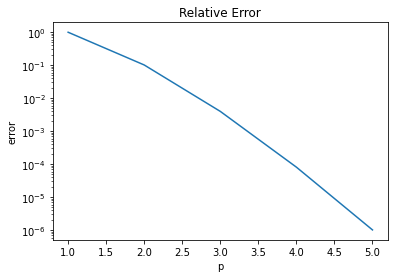

In [8]:

def gauss_legendre( func, p ):
    
    xi = gauss_nodes[p][0]  # quadrature nodes
    wi = gauss_nodes[p][1]  # quadrature weights 
    fg = sum(func(xi)*wi)   # sum( f(x_i)w_i )
    return fg
    
alpha = np.pi / 3
def f(x): return np.sin( alpha * x) ** 2

F = 1 - 3*np.sqrt(3)/4/np.pi  # analytic solution to the integral
ep = []
for i in [1,2,3,4,5]:
    ep.append( abs(F - gauss_legendre(f,i))/abs(F) ) # relative error
plt.semilogy([1,2,3,4,5],ep)
plt.xlabel('p')
plt.ylabel('error')
plt.title('Relative Error')

### b)

We define the space of polynominals of degree $\le n$ as:
$$
	 V_n := \text{span}\left\{ \phi_0, \dots, \phi_n \right\} \quad \text{with} \; \; \phi_i(x) := x^i \quad \text{for} \; i \in \{ 0,\dots, n \}
$$
In fact, it is clear that
$$
		V_n = \left\{ \sum_{i=0}^n c_ix^i \;\;\bigg|\;\; c_0,c_1,\ldots,c_n\in\mathbb{R} \right\} = \mathbb{R}[x]_{\leq n}.
$$
Now, let us define the ```mass-matrix``` $ M$ as:
$$
		m_{i,j} := \int_{-1}^1 \phi_i(x) \phi_j(x) \; dx \qquad \text{for}\; i,j = 0,\dots, n.
$$
Create a function ```approx_mass_matrix```, that computes an approximation of the mass-matrix for $n=4$, using thr gauss-legendre quadrature of degree $p=5$. Furhtermore, create a second function ```mass_matrix``` that computes the integrals analytically and therfore determines the exact mass matrix. Print any norm of the difference between the exact value and the approximation.

How does the result connect to your observation in <b>(a)</b> ?

In [9]:
def approx_mass_matrix(n, p = 5):
    M = np.zeros([n+1,n+1])
    for i in range(n+1):
        for j in range(n+1):
            def Phi(x):
                return x**(i+j)
            M[i,j] = gauss_legendre(Phi ,p )
    return M

def mass_matrix(n):
    M = np.zeros([n+1,n+1])
    for i in range(n+1):
        for j in range(n+1):
            M[i,j] = (1 - (-1)**(i+j+1))/(i+j+1)  # analytic solution to the integral 
    return M 

    
m1, m2 = mass_matrix( 4 ), approx_mass_matrix( 4 )
print( np.linalg.norm( m1 - m2) )

3.365184701171237e-16


### c) Theory

Show that
$$
		\mathbf a^\top M\mathbf b = \int_{-1}^1 \left( \sum_{i=0}^{n} a_i x^i \right) \left( \sum_{i=0}^n b_i x^i \right)\text{d}x
$$

holds for all vectors $\mathbf a=(a_0,a_1,\ldots,a_n)$ and $\mathbf b=(b_0,b_1,\ldots,b_n)$ in $\mathbb{R}^{n+1}$.

### d) Theory

Since the mass-matrix $M$ is symmetric, we can find an ```orthogonal basis``` of eigenvectors $\mathbf{c_0},\mathbf{c_1},\ldots,\mathbf{c_n}\in\mathbb{R}^{n+1}$ of $M$, associated to the eigenvalues $\lambda_0,\lambda_1,\ldots,\lambda_n$.
In particular, the eigenvectors satisfy $\mathbf{c_i}^\top\mathbf{c_j}=0$ whenever $i\neq j$.
Suppose in addition that the eigenvectors are scaled in such a way that $\left\| \mathbf{c_j} \right\|_2=\lambda_j^{-1/2}$ for $j=0,\ldots,n$.

Show that the polynomials $\psi_0,\psi_1,\ldots,\psi_n$ defined as

\begin{equation*}
	\psi_j(x) := \sum_{i=0}^n c_{ji} x^i, \qquad \text{for }j=0,1,\ldots,n,
\end{equation*}
where $\mathbf{c_j}=(c_{j0},c_{j1},\ldots,c_{jn})$, form an ```orthonormal basis``` of $V_n$, i.e., they satisfy:
\begin{equation*}
	\int_{-1}^1 \psi_i(x) \psi_j(x) dx =
	\begin{cases} 1 & \text{if } i = j,\\ 0 & \text{otherwise,} \end{cases}
	\tag{1}
\end{equation*}
for all $i,j=0,1,\ldots,n$.

### e) Theory:
Let $U \in \mathbb{R}^{n+1,n+1}$ be an ```orthogonal matrix```, i.e., such that $U^\top U = U U^\top = I_{n+1}$. 
Let $C=[\mathbf{c_0},\mathbf{c_1},\ldots,\mathbf{c_n}]\in\mathbb{R}^{n+1,n+1}$ the matrix that has the eigenvectors $\mathbf{c_0},\mathbf{c_1},\ldots,\mathbf{c_n}$ of $M$ as columns, and let
$$
		\tilde{C} = CU = [\tilde{\mathbf{c}}_0,\tilde{\mathbf{c}}_1,\ldots,\tilde{\mathbf{c}}_n] \in \mathbb{R}^{n+1,n+1}.
$$
Show that the transformed polynomials
$$ 
	\tilde\psi_j(x) := \sum_{i=0}^n \tilde c_{ji} x^i, \qquad \text{for }j=0,1,\ldots,n,
$$
also form an orthonormal basis of $V_n$, i.e., they also satisfy (1). 
### f) Theory:

Show that there exists an orthogonal matrix $U$ such that $\tilde{\psi}_j$ satisfies:

$$ \text{deg}(\tilde{\psi}_j ) = j, \qquad \text{for }j=0,1,\dots,n. $$
    
<b>Hint:</b> You can use the following linear algebra fact: given any square matrix $C\in\mathbb{R}^{n+1,n+1}$, there exist two matrices $Q,R\in\mathbb{R}^{n+1,n+1}$ such that $C=RQ$, with $Q$ orthogonal and $R$ upper triangular. This decomposition, that is unique whenever $C$ is invertible, is known as ```RQ decomposition```. This result is a direct consequence of applying the Gram-Schmidt orthogonalization on the rows of $C$.
	 
<b>Note:</b> One can also show that $\tilde{\psi}_i$ is independent of $n$, and that $R$ does not depend on the ordering of the columns of $C$, but it is not required.

### g) Programming

Compute $\tilde{\psi}_i$ for $i \in \{0,\dots, n \}$ and $n=5$, by using the exact mass-matrix and the matrix $U$ constructed in <b>(f)</b>.

To do that, you might need to construct a RQ decomposition. You can either write your own code or use the built-in function in Python ```scipy.linalg.rq```.

Plot the obtained functions, known as ```Legendre polynomials```, in a single figure, and use ```matshow``` to visualize the matrix $\tilde C$. Then plot $\tilde{\psi}_5$, and mark the Gauss-Legendre points $x_i$ for $p=5$ on the x-axis.
	
<b>Hint:</b> to evaluate $\tilde\psi_5(x_i)$, you can use the built-in function ```numpy.polyval```. Be aware that numpy expect the coefficient vector to be ordered from highest to lowest degree.
	
<b>Note:</b> This is not the commonly used, numerical stable, or most efficient way to compute these polynomials!

<ipython-input-10-4bd767558798>:7: ComplexWarning: Casting complex values to real discards the imaginary part
  C[i] = C[i] / norm / (np.sqrt(Lambda[i]))
<ipython-input-10-4bd767558798>:7: ComplexWarning: Casting complex values to real discards the imaginary part
  C[i] = C[i] / norm / (np.sqrt(Lambda[i]))


Text(0.5, 1.0, 'Plot of Phi_5 functions')

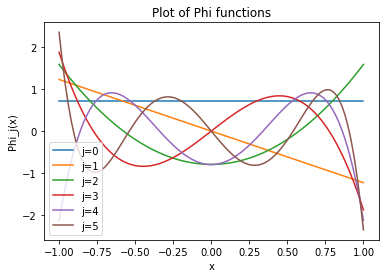

<Figure size 432x288 with 0 Axes>

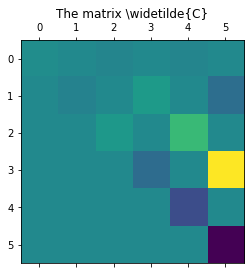

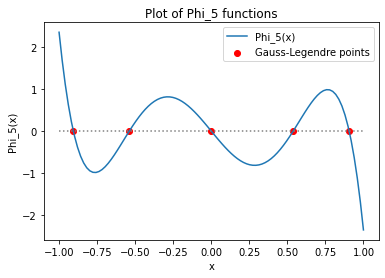

In [10]:
def get_phi_coeff( n ):
    Lambda = la.eig( mass_matrix( n ) )[0]  # Eigenvalues of mass matrix
    C = la.eig( mass_matrix( n ) )[1]        # Eigenvectors of mass matrix
    C = C.T
    for i in range(n+1):
        norm = np.sqrt( sum( e**2 for e in C[i] ) ) 
        C[i] = C[i] / norm / (np.sqrt(Lambda[i]))
        #print([ np.sqrt( sum( e**2 for e in C[i] ) ) ,float( 1/np.sqrt(Lambda[i])) ])
        #print(  np.dot(C[i],C[1]) )
    C = C.T
    R, Q = la.rq( C )

    return R
    
C_t = get_phi_coeff( 5 )
C_t = C_t.T    # Transpose C^

x = np.linspace(-1,1,100)
plt.figure()
for i in range(5+1):
    c = C_t[i][::-1]  # Reverse the array
    plt.plot(x,np.polyval(c,x),label='j={}'.format(i))
plt.legend()
plt.xlabel('x')
plt.ylabel('Phi_j(x)')
plt.title('Plot of Phi functions')

# Figure of C^ matrix
plt.figure()
plt.matshow(get_phi_coeff( 5 ))
plt.title('The matrix \widetilde{C}')

plt.figure()
plt.plot(x,np.polyval(C_t[5][::-1],x),label='Phi_5(x)')
xx = gauss_nodes[5][0]
plt.scatter(xx,np.zeros(5),c='r',label='Gauss-Legendre points')
plt.plot(x,np.zeros(len(x)),c='gray',linestyle='dotted')
plt.legend()
plt.xlabel('x')
plt.ylabel('Phi_5(x)')
plt.title('Plot of Phi_5 functions')

# This result is incorrect. Strange
# Perhaps because C matrix is incorrect
#....

### h) Programming

We now define equivalently the Gauss-Legendre nodes $x_i$ to $p \in \mathbb{N}$ as the roots of $\tilde{\psi}_{p}$, i.e.:

$$
	\tilde{\psi}_p(x_i) = 0 \qquad \text{for all} \; i=1,\ldots,p.
$$

By requiring the quadrature formula to be exact when applied to $\tilde\psi_0,\ldots,\tilde\psi_{p-1}$, one can show (this is not required) that the quadrature weights have the form

$$
	w_i = \left(\sum_{j=1}^{p}\psi_{j-1}(x_i)^2\right)^{-1}, \qquad\text{for }i=1,\ldots,p.
$$

Write a function ```gauss_quadrature``` that takes as input $p\in\mathbb{N}$, and computes the corresponding quadrature nodes and weights.
Compare your result with the nodes and weights given in <b>(a)</b>, for $p=5$.
	
<b>Hint:</b> You can use ```numpy.roots``` to compute the roots of the polynomial. Again, be aware that they expect the coefficient vector to be ordered from highest to lowest degree.
	
<b>Note:</b> Normally one would use a different way to compute the nodes which will be much faster and much more stable, but requires a different theoretical approach.

In [11]:
def gauss_quadrature( p ):
    C_t = get_phi_coeff( p )
    x = np.roots( C_t.T[p][::-1] )
    w = 0
    for i in range(p):
        w += ( np.polyval(C_t.T[i][::-1],x) )**2
    w = 1/w
    return x,w

x1,w1 = gauss_nodes[5]
x2,w2 = gauss_quadrature(5)

print( x1, x2 )
print( w1, w2 )

[-0.90617985 -0.53846931  0.          0.53846931  0.90617985] [-9.06179846e-01 -5.38469310e-01  9.06179846e-01  5.38469310e-01
 -1.55670409e-15]
[0.23692689 0.47862867 0.56888889 0.47862867 0.23692689] [0.23692689 0.47862867 0.23692689 0.47862867 0.56888889]


<ipython-input-10-4bd767558798>:7: ComplexWarning: Casting complex values to real discards the imaginary part
  C[i] = C[i] / norm / (np.sqrt(Lambda[i]))


### i) Programming
Finally, write a function ```gauss_legendre``` that takes as input a function $f$ and a number $p\in\mathbb{N}$, and computes an approximation of the integral $F=\int_{-1}^1 f(x)\,\text{d}x$ using the corresponding Gauss-Legendre quadrature rule with $p$ points.
Then plot the relative error as in <b>(a)</b>, this time for $f(x):=\sin( 2 \pi x  )^2$ and $p \in \{ 1,\dots, 20 \}$.

<ipython-input-10-4bd767558798>:7: ComplexWarning: Casting complex values to real discards the imaginary part
  C[i] = C[i] / norm / (np.sqrt(Lambda[i]))


Text(0.5, 1.0, 'Relative Error')

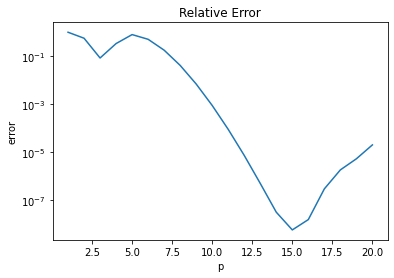

In [12]:
def gauss_legendre( func, p ):
    x, w = gauss_quadrature( p )
    fg = sum( func( x ) * w )  
    return fg

alpha = 2 * np.pi
def f(x): return np.sin( alpha * x) ** 2
    
F = 1  # analytic solution to the integral
ep = []
for i in range(20):
    ep.append( abs(F - gauss_legendre(f,i+1))/abs(F) ) # relative error
plt.semilogy(np.linspace(1,20,20),ep)
plt.xlabel('p')
plt.ylabel('error')
plt.title('Relative Error')